# Estimate the Life Satisfaction based on GDP

Based on the GDP (Gross Domestic Product) of the country, estimate if the people of the country have high life satisfaction or not? Data sources can be downloaded form OECD's website [link](https://stats.oecd.org/index.aspx) and IMF's website [link](http://goo.gl/j1MSKe).

### Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gdp_data = pd.read_csv('data/gdp_rate.csv', encoding = "ISO-8859-1")
gdp_data.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.38",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.14",2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,100.32",2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","14,414.30",2011.0


In [3]:
gdp_data = gdp_data[['Country', '2015']]
gdp_data.head()

,Country,2015
0,Afghanistan,599.994
1,Albania,"3,995.38"
2,Algeria,"4,318.14"
3,Angola,"4,100.32"
4,Antigua and Barbuda,"14,414.30"


In [4]:
gdp_data.rename(columns={'2015': 'GDP'}, inplace=True)
gdp_data.head()

,Country,GDP
0,Afghanistan,599.994
1,Albania,"3,995.38"
2,Algeria,"4,318.14"
3,Angola,"4,100.32"
4,Antigua and Barbuda,"14,414.30"


In [5]:
life_index_data = pd.read_csv('data/life_index.csv')
life_index_data.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.9,NaN,NaN


In [6]:
life_index_data = life_index_data[(life_index_data['INEQUALITY']== "TOT") & (life_index_data['Indicator']=='Life satisfaction')]
life_index_data.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2669,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2670,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
2671,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.9,NaN,NaN
2672,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.3,NaN,NaN
2673,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,6.5,NaN,NaN


In [7]:
life_index_data = life_index_data.groupby(['Country'])['Value'].sum()
life_index_data.head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Value, dtype: float64

## Merge the data of GDP and Life Expectancy based on Country Name

In [8]:
life_index_data = pd.DataFrame(life_index_data)
life_index_data.head()

,Value
Country,
Australia,7.3
Austria,6.9
Belgium,6.9
Brazil,7.0
Canada,7.3


In [9]:
life_index_data.rename(columns={'Value': 'Life_Satisfaction'}, inplace=True)
life_index_data.head()

,Life_Satisfaction
Country,
Australia,7.3
Austria,6.9
Belgium,6.9
Brazil,7.0
Canada,7.3


In [10]:
gdp_data = gdp_data.set_index(['Country'])
gdp_data.head()

,GDP
Country,
Afghanistan,599.994
Albania,"3,995.38"
Algeria,"4,318.14"
Angola,"4,100.32"
Antigua and Barbuda,"14,414.30"


In [11]:
gdp_life_data = pd.merge(left=gdp_data, right=life_index_data, left_index=True, right_index=True)
gdp_life_data.head()

,GDP,Life_Satisfaction
Country,,
Australia,"50,961.87",7.3
Austria,"43,724.03",6.9
Belgium,"40,106.63",6.9
Brazil,"8,670.00",7.0
Canada,"43,331.96",7.3


### Visualize the data using the scatter plot

In [12]:
gdp_life_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Australia to United States
Data columns (total 2 columns):
GDP                  36 non-null object
Life_Satisfaction    36 non-null float64
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


In [13]:
values = [x.replace(',','') for x in gdp_life_data.GDP]
values

['50961.87',
 '43724.03',
 '40106.63',
 '8670.00',
 '43331.96',
 '13340.91',
 '17256.92',
 '52114.17',
 '17288.08',
 '41973.99',
 '37675.01',
 '40996.51',
 '18064.29',
 '12239.89',
 '50854.58',
 '51350.74',
 '35343.34',
 '29866.58',
 '32485.55',
 '27195.20',
 '101994.09',
 '9009.28',
 '43603.12',
 '37044.89',
 '74822.11',
 '12495.33',
 '19121.59',
 '9054.91',
 '15991.74',
 '20732.48',
 '25864.72',
 '49866.27',
 '80675.31',
 '9437.37',
 '43770.69',
 '55805.20']

In [14]:
gdp_life_data.GDP = pd.to_numeric(values)
gdp_life_data.head()

,GDP,Life_Satisfaction
Country,,
Australia,50961.87,7.3
Austria,43724.03,6.9
Belgium,40106.63,6.9
Brazil,8670.00,7.0
Canada,43331.96,7.3


In [15]:
gdp_life_data.sort_values(by='GDP', ascending=True, inplace=True)
gdp_life_data.head()

,GDP,Life_Satisfaction
Country,,
Brazil,8670.00,7.0
Mexico,9009.28,6.7
Russia,9054.91,6.0
Turkey,9437.37,5.6
Hungary,12239.89,4.9


In [16]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
gdp_life_data = gdp_life_data.iloc[keep_indices][:29]
gdp_life_data

,GDP,Life_Satisfaction
Country,,
Russia,9054.91,6.0
Turkey,9437.37,5.6
Hungary,12239.89,4.9
Poland,12495.33,5.8
Slovak Republic,15991.74,6.1
Estonia,17288.08,5.6
Greece,18064.29,4.8
Portugal,19121.59,5.1
Slovenia,20732.48,5.7


In [17]:
gdp_life_data.head()

,GDP,Life_Satisfaction
Country,,
Russia,9054.91,6.0
Turkey,9437.37,5.6
Hungary,12239.89,4.9
Poland,12495.33,5.8
Slovak Republic,15991.74,6.1


In [18]:
gdp_life_data

,GDP,Life_Satisfaction
Country,,
Russia,9054.91,6.0
Turkey,9437.37,5.6
Hungary,12239.89,4.9
Poland,12495.33,5.8
Slovak Republic,15991.74,6.1
Estonia,17288.08,5.6
Greece,18064.29,4.8
Portugal,19121.59,5.1
Slovenia,20732.48,5.7


In [19]:
gdp_life_data.to_csv('country_gdp_life_satisfaction_data.csv')

PermissionError: [Errno 13] Permission denied: 'country_gdp_life_satisfaction_data.csv'

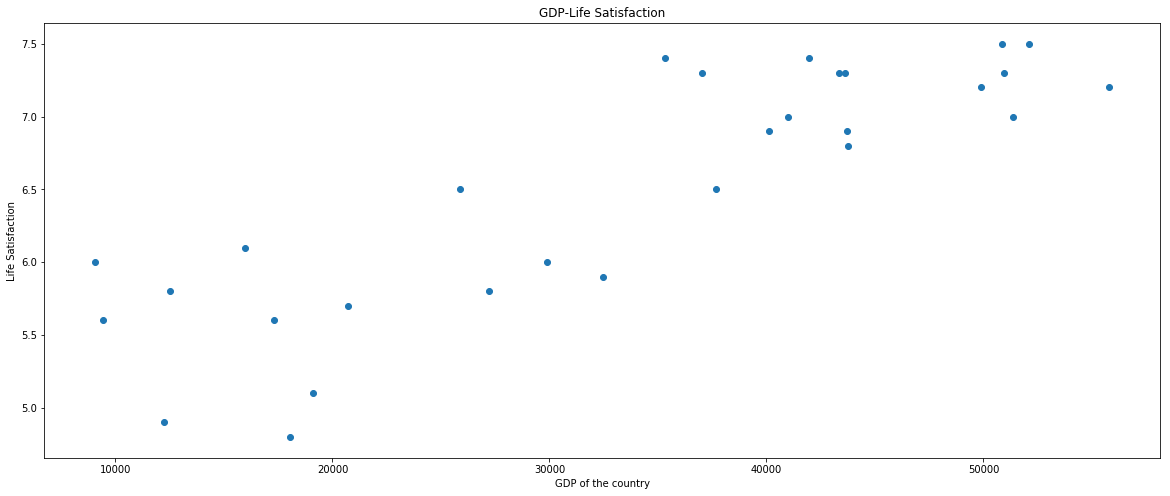

In [21]:
plt.figure(figsize=(20, 8))
plt.scatter(x='GDP', y='Life_Satisfaction', data=gdp_life_data)
plt.xlabel('GDP of the country')
plt.ylabel('Life Satisfaction')
plt.title('GDP-Life Satisfaction')
plt.show()

## Performing Machine Learning - Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model = LinearRegression()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
training_data = gdp_life_data['GDP']
output_data = gdp_life_data['Life_Satisfaction']

In [26]:
import numpy as np

In [27]:
train = np.c_[gdp_life_data.GDP]
output = np.c_[gdp_life_data.Life_Satisfaction]
train

array([[ 9054.91],
       [ 9437.37],
       [12239.89],
       [12495.33],
       [15991.74],
       [17288.08],
       [18064.29],
       [19121.59],
       [20732.48],
       [25864.72],
       [27195.2 ],
       [29866.58],
       [32485.55],
       [35343.34],
       [37044.89],
       [37675.01],
       [40106.63],
       [40996.51],
       [41973.99],
       [43331.96],
       [43603.12],
       [43724.03],
       [43770.69],
       [49866.27],
       [50854.58],
       [50961.87],
       [51350.74],
       [52114.17],
       [55805.2 ]])

In [28]:
new_train_data = gdp_life_data.GDP.values.tolist()

In [29]:
new_output_data = np.array(gdp_life_data.Life_Satisfaction.values)

In [30]:
new_train_data

[9054.91,
 9437.37,
 12239.89,
 12495.33,
 15991.74,
 17288.08,
 18064.29,
 19121.59,
 20732.48,
 25864.72,
 27195.2,
 29866.58,
 32485.55,
 35343.34,
 37044.89,
 37675.01,
 40106.63,
 40996.51,
 41973.99,
 43331.96,
 43603.12,
 43724.03,
 43770.69,
 49866.27,
 50854.58,
 50961.87,
 51350.74,
 52114.17,
 55805.2]

In [48]:
X, x_test, Y, y_test = train_test_split(train, output, test_size=0.2, random_state=42)

In [49]:
model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
model.predict([[12113]])

array([[5.46315816]])

In [53]:
x_test

array([[52114.17],
       [40106.63],
       [32485.55],
       [43770.69],
       [20732.48],
       [25864.72]])

In [51]:
prediction_result = model.predict(x_test)

In [52]:
prediction_result

array([[7.43060375],
       [6.84001649],
       [6.46517594],
       [7.02023218],
       [5.88710471],
       [6.1395324 ]])

In [57]:
y_test

array([[7.5],
       [6.9],
       [5.9],
       [6.8],
       [5.7],
       [6.5]])

In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
rmse = np.sqrt(mean_squared_error(prediction_result, y_test))
rmse

0.30035672819702425

In [56]:
y_test

array([[7.5],
       [6.9],
       [5.9],
       [6.8],
       [5.7],
       [6.5]])

In [39]:
from sklearn.externals import joblib

In [40]:
file_name = "country-gdp-model.sav"

In [41]:
joblib.dump(filename=file_name, value=model)

['country-gdp-model.sav']